<a href="https://colab.research.google.com/github/rajeshmore1/Performance---Fireducks-Vs-Pandas/blob/main/Fireducks_Vs_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fireducks vs Pandas: Performance Comparison

https://fireducks-dev.github.io/docs/get-started/

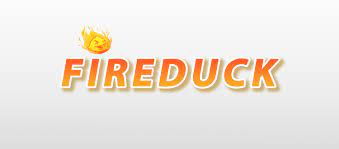

In [2]:
#%%capture
!pip install fireducks

  Using cached pyarrow-17.0.0-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (3.3 kB)
Using cached pyarrow-17.0.0-cp310-cp310-manylinux_2_28_x86_64.whl (39.9 MB)
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 15.0.2
    Uninstalling pyarrow-15.0.2:
      Successfully uninstalled pyarrow-15.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.


In [13]:
#%%capture
!pip install pyarrow==15.0.2



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 43.4 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 17.0.0
    Uninstalling pyarrow-17.0.0:
      Successfully uninstalled pyarrow-17.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 15.0.2 which is incompatible.
fireducks 1.0.5 requires pyarrow<17.1,>=17.0, but you have pyarrow 15.0.2 which is incompatible.


In [6]:
import fireducks.pandas as fd # you can import as pd


In [5]:
#import pandas as pd
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt


# 1. Introduction
## What is FireDucks?
FireDucks is a python library developed by NEC to speed up the analysis of “pandas”. It is said to make use of NEC’s high-performance programming technology and performance tuning know-how developed over more than 30 years of supercomputer development!

This notebook compares the performance of Fireducks, a fast alternative to pandas,with pandas itself. We'll perform various operations and measure the execution time
for both libraries.

# Load and run data

We used the Video_Ads Engagement Dataset from Kaggle. The dataset is about 500MB and contains 3 million video ad auctions.

I could successfully execute the exact same code written for pandas. The loading speed was extremely faster. In my environment, it took 4 seconds with pandas, but with FireDucks it took 74.5ns.



In [14]:
%%timeit
df_pandas = pd.read_csv("ad_df.csv")

26.1 ms ± 4.84 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [21]:
df_pandas = pd.read_csv("ad_df.csv")

In [11]:
%%timeit
df_fireducks = fd.read_csv("ad_df.csv")

21 ms ± 4.59 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
df_fireducks = fd.read_csv("ad_df.csv")

In [19]:
df_fireducks.head()

,auction_id,timestamp,creative_duration,creative_id,campaign_id,advertiser_id,placement_id,placement_language,website_id,referer_deep_three,ua_country,ua_os,ua_browser,ua_browser_version,ua_device,user_average_seconds_played,seconds_played
0,0008b046-b675-4f51-8ad6-fe06e5d81f8e,1517334694,25,198280,210671,7109.0,47216,fr,31838,de/golf/publish,ch,Windows,Microsoft Edge,16.0,PersonalComputer,NaN,9
1,00095bac-8fec-48c8-a17b-8f3878359e1d,1517270483,29,195285,210074,2270.0,77249,fr,46416,com/vinepair/articles,uk,Windows,Chrome,64.0,PersonalComputer,NaN,8
2,000c4c0c-0789-4e50-8ba6-a4be920ab482,1517339899,60,201430,214063,2643.0,25817,fr,20824,co.uk/hastingsobserver/news,uk,iOS,Facebook App,NaN,Tablet,NaN,1
3,000db509-3350-4cd9-b60a-d506fbd31f29,1517346542,29,198262,215400,2244.0,86526,fr,39091,com/slate/news-and-politics,us,Windows,Chrome,63.0,PersonalComputer,18.166666,1
4,001300de-8eda-480f-bec8-4b46ef6117f2,1517310926,29,174590,184750,3617.0,85350,fr,14796,co.uk/independent/arts-entertainment,uk,Windows,Firefox,58.0,PersonalComputer,NaN,0


In [26]:
%%timeit
# 1. analysis based on time period and creative duration
# convert timestamp to date/time object
df_pandas['timestamp_converted'] = pd.to_datetime(df_pandas['timestamp'], unit='s')

# define time period
def get_part_of_day(hour):
  if 5 <= hour < 12:
    return 'morning'
  elif 12 <= hour < 17:
    return 'afternoon'
  else:
    return 'evening'

# Add time period in new column
df_pandas['part_of_day'] = df_pandas['timestamp_converted'].apply(lambda x: get_part_of_day(x.hour))

# Calculate average creative duration by time period
df_duration_by_time = df_pandas.groupby('part_of_day')['creative_duration'].mean()
print(df_duration_by_time)
"""
# 2. campaign performance per different advertiser
df_campaigns_per_advertiser = df_pandas.groupby('advertiser_id')['campaign_id'].nunique()
df_creatives_per_advertiser = df_pandas.groupby('advertiser_id ')['creatives_id'].nunique()
print(df_campaigns_per_advertiser)
print(df_creatives_per_advertiser)
"""
# 3. language and website association
df_common_website_per_language = df_pandas.groupby('placement_language')['website_id'].apply(lambda x: x.mode()[0])
print(df_common_website_per_language)



part_of_day
afternoon    28.541031
evening      28.244343
morning      31.895570
Name: creative_duration, dtype: float64
placement_language
de    30887
en    30353
es    29493
fr    39541
it    28321
pt    31977
Name: website_id, dtype: int64
part_of_day
afternoon    28.541031
evening      28.244343
morning      31.895570
Name: creative_duration, dtype: float64
placement_language
de    30887
en    30353
es    29493
fr    39541
it    28321
pt    31977
Name: website_id, dtype: int64
part_of_day
afternoon    28.541031
evening      28.244343
morning      31.895570
Name: creative_duration, dtype: float64
placement_language
de    30887
en    30353
es    29493
fr    39541
it    28321
pt    31977
Name: website_id, dtype: int64
part_of_day
afternoon    28.541031
evening      28.244343
morning      31.895570
Name: creative_duration, dtype: float64
placement_language
de    30887
en    30353
es    29493
fr    39541
it    28321
pt    31977
Name: website_id, dtype: int64
part_of_day
afternoon    28.

In [27]:
%%timeit
# 1. analysis based on time period and creative duration
# convert timestamp to date/time object
df_fireducks['timestamp_converted'] = pd.to_datetime(df_fireducks['timestamp'], unit='s')

# define time period
def get_part_of_day(hour):
  if 5 <= hour < 12:
    return 'morning'
  elif 12 <= hour < 17:
    return 'afternoon'
  else:
    return 'evening'

# Add time period in new column
df_fireducks['part_of_day'] = df_fireducks['timestamp_converted'].apply(lambda x: get_part_of_day(x.hour))

# Calculate average creative duration by time period
df_duration_by_time = df_fireducks.groupby('part_of_day')['creative_duration'].mean()
print(df_duration_by_time)

# 3. language and website association
df_common_website_per_language = df_fireducks.groupby('placement_language')['website_id'].apply(lambda x: x.mode()[0])
print(df_common_website_per_language)



part_of_day
afternoon    28.541031
evening      28.244343
morning      31.895570
Name: creative_duration, dtype: float64
placement_language
de    30887
en    30353
es    29493
fr    39541
it    28321
pt    31977
Name: website_id, dtype: int64
part_of_day
afternoon    28.541031
evening      28.244343
morning      31.895570
Name: creative_duration, dtype: float64
placement_language
de    30887
en    30353
es    29493
fr    39541
it    28321
pt    31977
Name: website_id, dtype: int64
part_of_day
afternoon    28.541031
evening      28.244343
morning      31.895570
Name: creative_duration, dtype: float64
placement_language
de    30887
en    30353
es    29493
fr    39541
it    28321
pt    31977
Name: website_id, dtype: int64
part_of_day
afternoon    28.541031
evening      28.244343
morning      31.895570
Name: creative_duration, dtype: float64
placement_language
de    30887
en    30353
es    29493
fr    39541
it    28321
pt    31977
Name: website_id, dtype: int64
part_of_day
afternoon    28.